In [42]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import plot as dp_plot
from scipy import stats
%matplotlib inline
%config IPCompleter.greedy=True

In [43]:
# Some plotting parameters that help standardize figure output
sns.set_style("darkgrid")
FIGSIZE = (10,8)
sns.set(rc={'figure.figsize':FIGSIZE })
plt.rcParams["figure.figsize"] = FIGSIZE 

## Introduction to the data

In this EDA, we take a look at data related to customer information from some sort of marketing campaign.

The data is taken from https://www.kaggle.com/imakash3011/customer-personality-analysis, and the variables are as follows:

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

## Goal

Our goal for this EDA will be to identify types of customers and group them. We will also take a quick look at the spending habits of each of these groups.

As we don't have labels for what type of customer we are dealing with, we will utilise k-means clustering, an unsupervised clustering method to group our customers

## Loading the Data

In [44]:
data = pd.read_csv('../data/marketing_campaign.csv',header=0,sep=';')

## Getting an idea of the data

In [45]:
data.shape

(2240, 29)

We see that we have 2240 customers, and 30 features for each of them

In [46]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

From the above, we find 3 objects. "Education", "Marital Status", and "Dt_Customer". We will need to take care of these later on as k-means clustering works best with numerical data

Using panda's built in functions and an extremely helpful library (in jupytern notebook), we can take a look at both a numerical and visual summary of the distributions of our features

In [47]:
np.round(data.describe().T.drop(columns = ['count']), 3)

,mean,std,min,25%,50%,75%,max
ID,5592.160,3246.662,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,1968.806,11.984,1893.0,1959.00,1970.0,1977.00,1996.0
Income,52247.251,25173.077,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,0.444,0.538,0.0,0.00,0.0,1.00,2.0
Teenhome,0.506,0.545,0.0,0.00,0.0,1.00,2.0
Recency,49.109,28.962,0.0,24.00,49.0,74.00,99.0
MntWines,303.936,336.597,0.0,23.75,173.5,504.25,1493.0
MntFruits,26.302,39.773,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,166.950,225.715,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,37.525,54.629,0.0,3.00,12.0,50.00,259.0


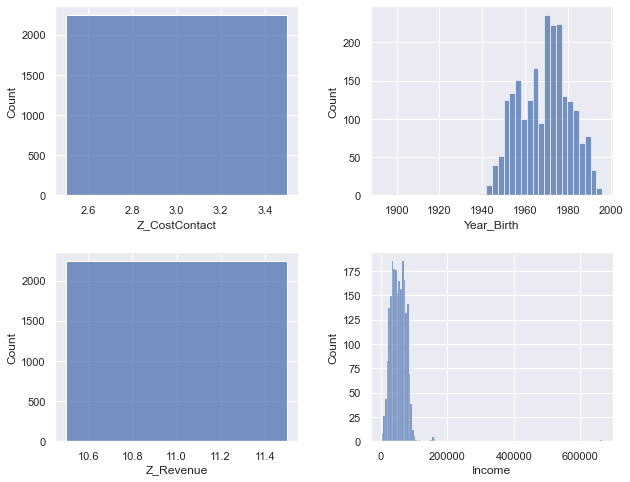

In [75]:
# Can run this to see if using jupyter notebook
# dp_plot(data)

# If not in jupyter notebook, the histograms of interest can be seen below
fig, ax = plt.subplots(2,2)
sns.histplot(ax = ax[0,0], x = 'Z_CostContact', data = data)
sns.histplot(ax = ax[1,0], x = 'Z_Revenue', data = data)
sns.histplot(ax = ax[0,1], x = 'Year_Birth', data = data)
sns.histplot(ax = ax[1,1], x = 'Income', data = data)
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

From the summaries, there are 2 things in particular that we need to deal with.

First, Z_CostContact and Z_Revenue seem to have only one value. These features are a waste of space and should be taken care of.

Secondly, in terms of our customer background (Education, Year of Birth, Income, Marital Status...), we notice that Year_Birth and Income have a relatively gaussian shape but also have extreme outliers, which we may need to deal with later on.

## Cleaning the data

We first want to deal with null values in our data

In [8]:
data.isnull().sum()[np.where(data.isnull().sum()!= 0)[0]]

Income    24
dtype: int64

Since we have 2240 datapoints and only 24 of them are null, lets just drop those observations


In [9]:
data = data.dropna()
data.reset_index(drop=True, inplace=True) # so indexing is fixed and we can correctly drop items later
data.shape

(2216, 29)

Without any nulls in our data, we can proceed with feature engineering.

First, let's make Year_Birth more intuitive by turning it into a feature called Age.

In [10]:
data["Age"] = 2021 - data["Year_Birth"]

While we're at it, we can also make Dt_customer (how long the customer has been with the company) a "easier variable"

In [11]:
data["Membership_Age"] = 2021 - pd.DatetimeIndex(data.Dt_Customer).year

Taking a look at marital status, we see that there are too many categories

In [12]:
data.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Since there are too many categories for marital status, let's just turn it into a feature that tells us if the customer is single or not

In [13]:
data['Single'] = np.where(data.Marital_Status.isin(["Married", "Together"]), 0, 1)

Let's also make "Children" a boolean condition based on "Kidhome" and "Teenhome", which are the number of kids/teens the customer has respectively

In [14]:
data['Children'] = (data.Kidhome + data.Teenhome) > 0

<br>
We can also add all the "Mnt" (amount) variables into "TotalMnt". After all, we care about the customers who spend a lot overall.

In [15]:
data['MntTotal'] = data.MntWines + data.MntFruits + data.MntMeatProducts + \
                    data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

<br>
We also likely don't care about which campaign the customer has accepted. We just want to know if they have accepted one before

In [16]:
data["Campaign"] = (data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 +\
                   + data.AcceptedCmp4 + data.AcceptedCmp4 + data.Response) > 0

Before we forget, we also need to take care of the outliers found in "Age" and "Income" by using the Zscore

In [17]:
to_drop_age = np.where(np.abs(stats.zscore(data.Age)) > 3)[0]
data = data.drop(index = to_drop_age)
data.reset_index(drop=True, inplace=True) # so indexing is fixed and we can correctly drop items later
print(f"We dropped {len(to_drop_age)} customers")

We dropped 3 customers


In [18]:
to_drop_income = np.where(np.abs(stats.zscore(data.Income)) > 3)[0]
data = data.drop(index = to_drop_income)
data.reset_index(drop=True, inplace=True) # so indexing is fixed and we can correctly drop items later
print(f"We dropped {len(to_drop_income)} customers")

We dropped 8 customers


As for education, I unfortunately do not understand the categories, in particular, I don't know what 'Graduation' and 'Basic' corresponds to.

In [19]:
data.Education.value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

I'm just going to guess that Graduation corresponds to people who have a Bachelor's or equivalent and Basic refers to those who have High School and below education. <br>
Assuming this fact, I'll create a new variable corresponding to whether the customer has at most an undergraduate degree

In [20]:
undergrad = ["Basic", "Graduation"]
data["Ugrad"] = np.where(data.Education.isin(undergrad), 1, 0)

<br>We will now drop some useless columns including ID, Z_Revenue and Z_CostContact (Recall Z_Revenue and Z_CostContact only have one value)

We can also drop the columns that we have used and no longer need

In [21]:
data = data.drop(['ID', 'Z_CostContact', 'Z_Revenue', 
                  'Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth', 'Response', 'Dt_Customer', 'Education',
                  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                  ], axis = 1)
data.shape

(2205, 21)

This leaves us with 21 columns, or attributes

<br><br>
## Clustering

Before we get to clustering, we should scale our data. This allows features to be treated equally in terms of different in values

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [23]:
# Standard Scale our variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data) # scale the data, but this does not return a dataframe
data_scaled = pd.DataFrame(data_scaled, columns= data.columns) # convert to dataframe

For clustering, 21 columns is typicall way too much. We can solve this by using PCA, a dimensionality reduction algorithm that keeps the dimensions where variance is most explained. Before we do that, we want to see how many dimensions we need to reduce to.

To do that, we will perform PCA on our data but keep the shape. What this does is allows PCA to find the most important demensions, as well as how well they maintain information regarding the original data.

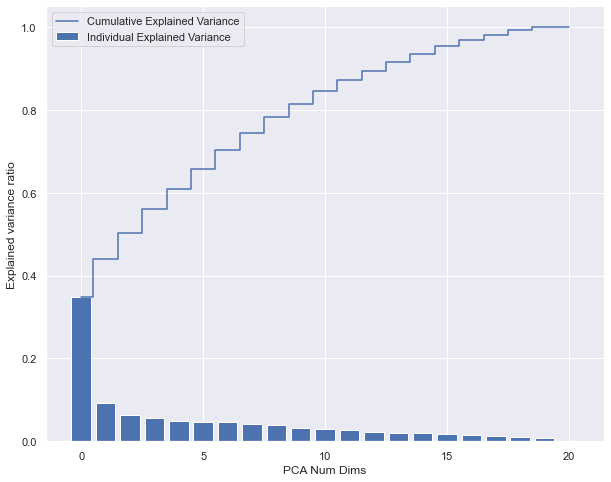

In [24]:
# Reduce our data to the same 21 dimensions
pca = PCA(n_components = 21)
pca.fit_transform(data_scaled)

# plot the cumulative variance ratio
xrange = np.arange(0, 21)

plt.bar(xrange, pca.explained_variance_ratio_, align='center', label='Individual Explained Variance')
plt.step(xrange, np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative Explained Variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('PCA Num Dims')

plt.legend(loc='best')
plt.show()

The above graph essentially tells how many dimensions stores retains how much variability from the data. For example, using PCA to reduce our data to 9 dimensions would leave us with a new dataset that explains around 80% of the original variability. In our case, we will use PCA do reduce our data to 4 dimensions, keeping roughly 60% of expalined variance.

In [25]:
# Reduce our data to 4 dimensions
pca = PCA(n_components=4)
pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), columns=["d1", "d2", "d3", "d4"])

Visual Result showing our data in terms of 3 (most important) dimensions

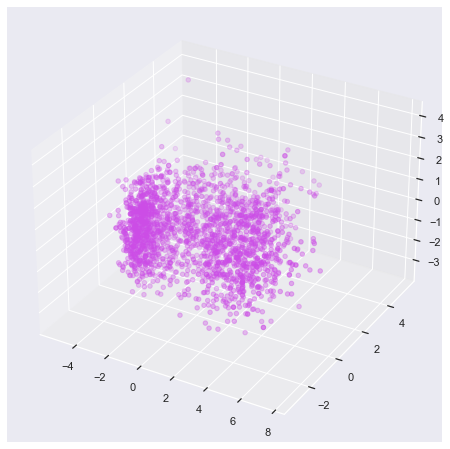

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca.d1, data_pca.d2, data_pca.d3, color=(0.8, 0.3, 0.9, 0.5))           
plt.show()

Now that we have reduced our data, we will prepare to cluster. To do that, we can use the elbow method to determine the optimal number of clusters

In [27]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_pca)
    distortions.append(kmeanModel.inertia_)

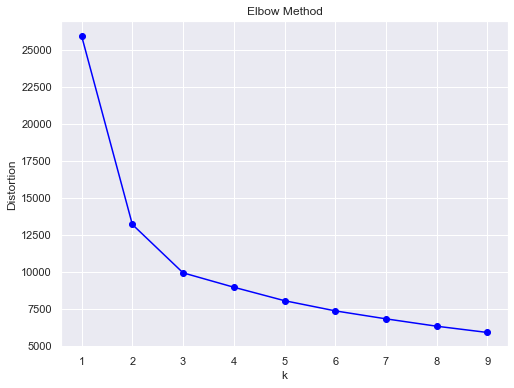

In [28]:
plt.figure(figsize = (8,6))
plt.plot(K, distortions, 'bo-', color="Blue")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

It seems like error starts to "drop less" after 3. We will assume 3 clusters, and use kmeans to learn 3 groups

In [29]:
model = KMeans(n_clusters=3, random_state=111).fit(data_pca) # seed for reproducability
clusters = model.labels_

In [30]:
data['Cluster'] = clusters

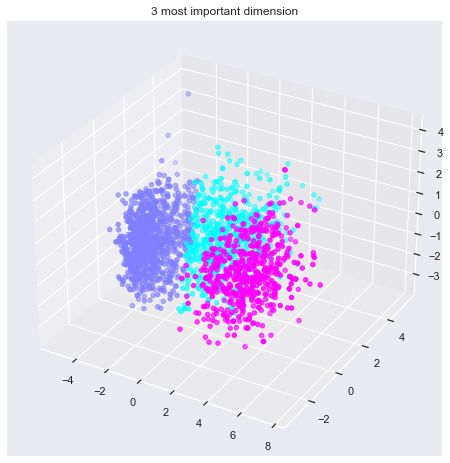

In [31]:
cols = np.repeat("blue", data_pca.shape[0])
cols[np.where(clusters == 1)] = "red"
cols[np.where(clusters == 2)] = "green"

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca.d1, data_pca.d2, data_pca.d3, c = clusters, cmap = 'cool')  
ax.title.set_text("3 most important dimension")
plt.show()

<br>

### Customer Analysis

Now that we have 3 clusters, what are the characteristics of these groups?

In [32]:
data.Cluster.value_counts()

1    1053
0     595
2     557
Name: Cluster, dtype: int64

Among our 3 clusters, we see that almost half of them are categorized as group 0, while the other half is split evenly into groups 1 and 2

But what can we say about these clusters?

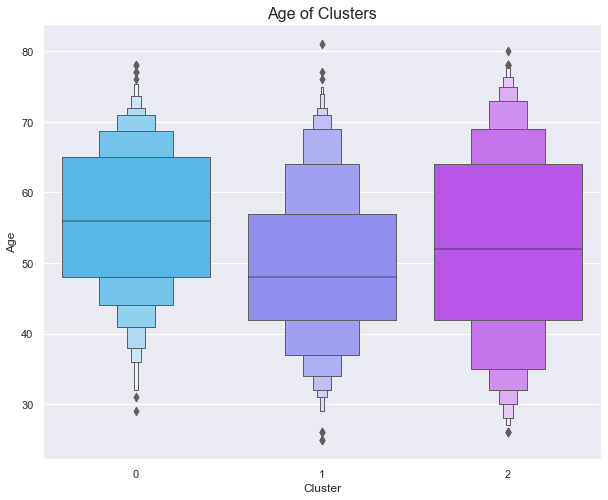

In [33]:
sns.boxenplot(x = "Cluster", y = "Age", data = data, palette = "cool")
plt.title("Age of Clusters", fontsize = 16)
plt.show()

Age appears rather even across our 3 groups, though group 0 appears to have a relative wide range of ages, while group one is younger and group 2 is older.

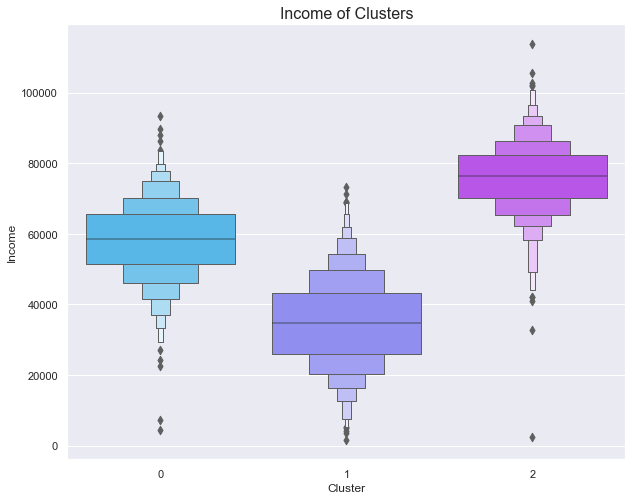

In [34]:
sns.boxenplot(x = "Cluster", y = "Income", data = data, palette = "cool")
plt.title("Income of Clusters", fontsize = 16)
plt.show()

There's an interesting split regarding income between the 3 groups. We see that group 0 is generally much richer than the other two groups, with group 1 having the lowest income on average.

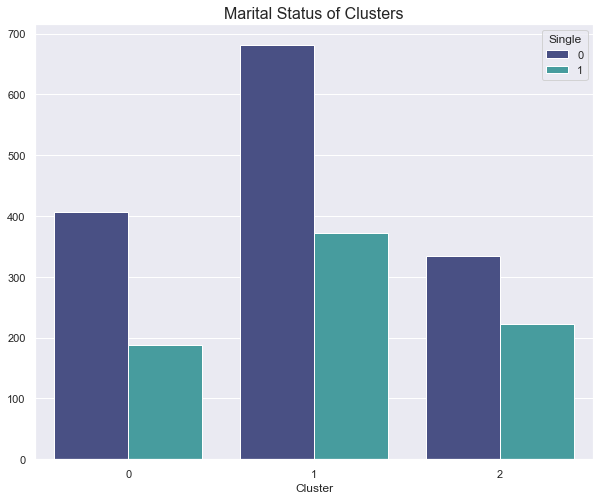

In [35]:
sns.countplot(x = "Cluster", data = data, palette = "mako", hue = "Single")
plt.title("Marital Status of Clusters", fontsize = 16)
plt.ylabel("")
plt.show()

While there appear to be more non-single customers, we notice that the ratio of in-a-relationship to single customers is much higher for groups 1 and 2 compared to group 0.

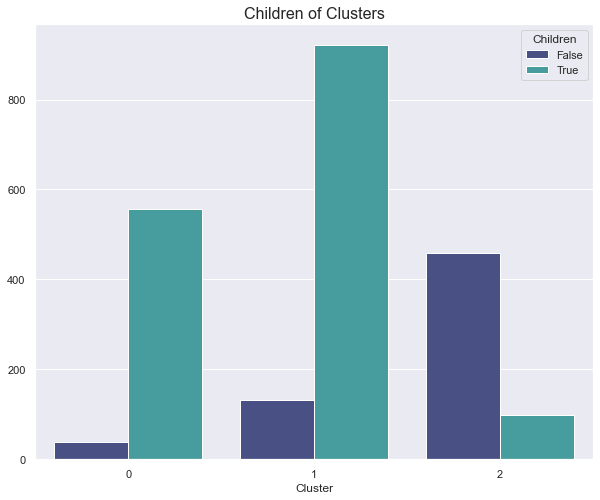

In [36]:
sns.countplot(x = "Cluster", data = data, palette = "mako", hue = "Children")
plt.title("Children of Clusters", fontsize = 16)
plt.ylabel("")
plt.show()

Another surprising result. While clusters 1 and 2 tend have children, we see that group 0 appears to be mainly "children free".

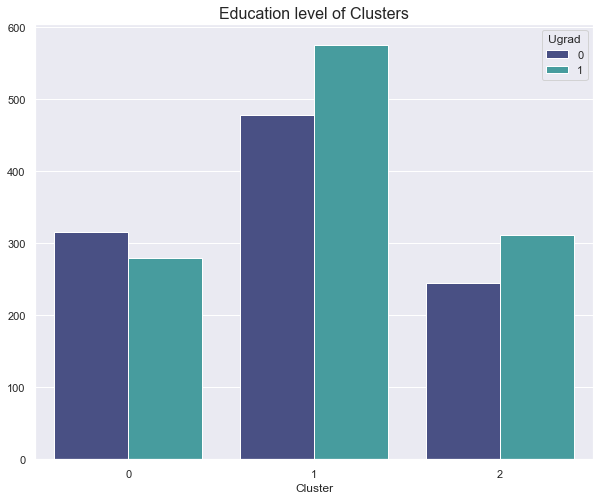

In [37]:
sns.countplot(x = "Cluster", data = data, palette = "mako", hue = "Ugrad")
plt.title("Education level of Clusters", fontsize = 16)
plt.ylabel("")
plt.show()

It appears that clusters 0 and 1 have more undergraduate or below education, while group 2 has more customers with above undergrad education. That said, the difference may be coincidental as the pattern isn't visually too obvious

### Our Groups

In general, our groups can be described as follows:

* Group 0:
    - Highest Income, no children
* Group 1: 
    - Lowest Income, with children
* Group 3: 
    - Middle Income, with children. May also be on the older side.

Now that we have found our 3 groups, let's take a look at how they spend

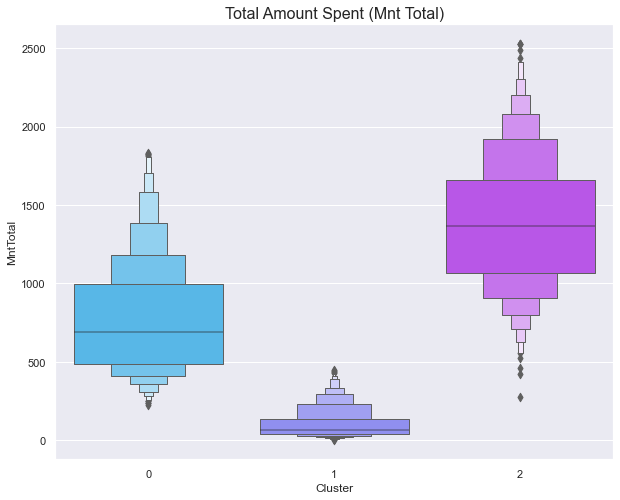

In [38]:
sns.boxenplot(x = "Cluster", y = "MntTotal", data = data, palette="cool")
plt.title("Total Amount Spent (Mnt Total)", fontsize = 16)
plt.show()

It's easy to see that group 0 spends the most, while group 1 spends the least. Recall that group 1 is the lower income group and generally are the customers with children. Perhaps they have to spend the majority of their income on their children?

We can also compare income against total amount spent.

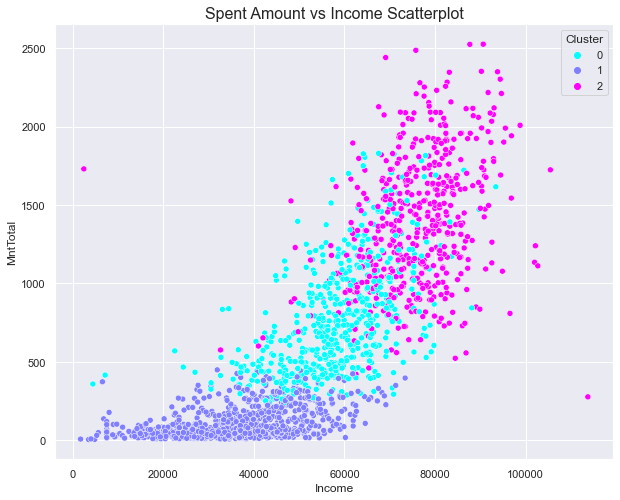

In [39]:
sns.scatterplot(x = "Income", y = "MntTotal", data = data, hue = "Cluster", palette="cool")
plt.title("Spent Amount vs Income Scatterplot", fontsize = 16)
plt.show()

This is going to sound dumb, but there appears to be a strong correlation between income and amount spent.

We might also be interested in seeing how each group buys specific products, so let's check that out

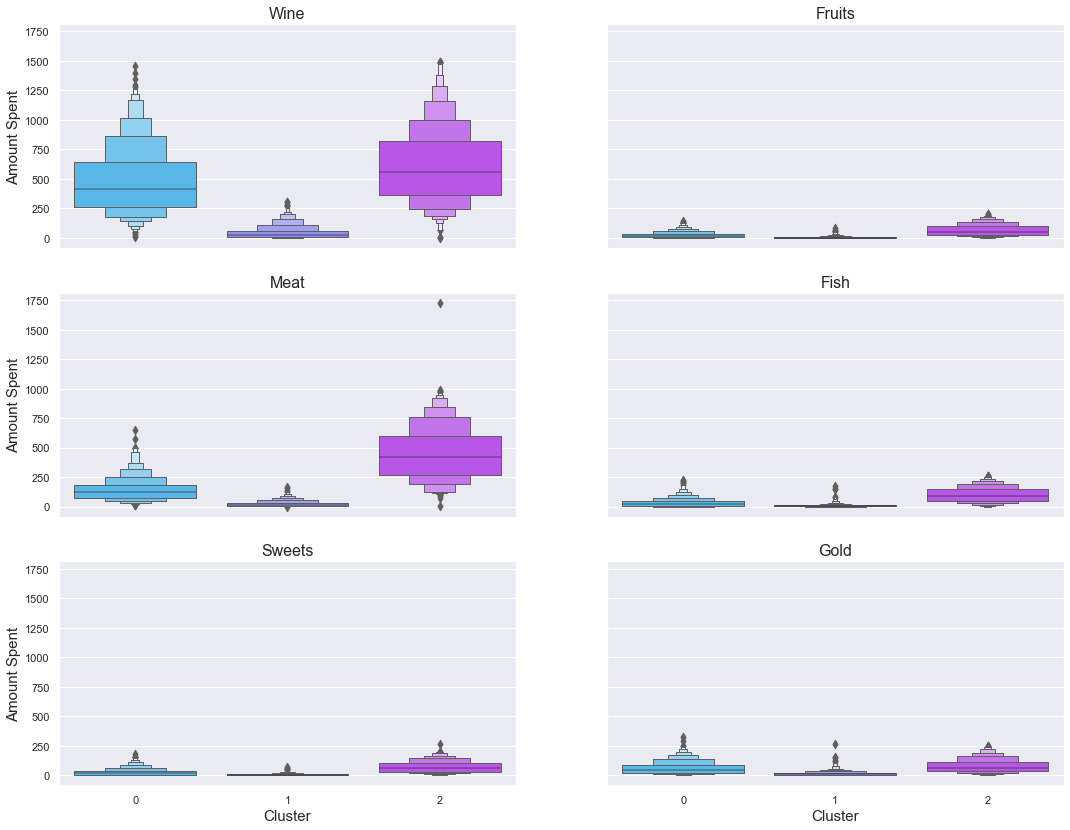

In [40]:
fig, ax = plt.subplots(3,2, sharex = True, sharey = True, figsize = (18,14))


sns.boxenplot(ax = ax[0,0],x = "Cluster", y = "MntWines", data = data, palette="cool")
ax[0,0].title.set_text("Wine")
ax[0,0].title.set_size(16)
ax[0,0].set_ylabel("Amount Spent", fontsize = 15)
ax[0,0].set_xlabel("")
sns.boxenplot(ax = ax[0,1],x = "Cluster", y = "MntFruits", data = data, palette="cool")
ax[0,1].title.set_text("Fruits")
ax[0,1].title.set_size(16)
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("")
sns.boxenplot(ax = ax[1,0],x = "Cluster", y = "MntMeatProducts", data = data, palette="cool")
ax[1,0].title.set_text("Meat")
ax[1,0].title.set_size(16)
ax[1,0].set_ylabel("Amount Spent", fontsize = 15)
ax[1,0].set_xlabel("")
sns.boxenplot(ax = ax[1,1],x = "Cluster", y = "MntFishProducts", data = data, palette="cool")
ax[1,1].title.set_text("Fish")
ax[1,1].title.set_size(16)
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("")
sns.boxenplot(ax = ax[2,0],x = "Cluster", y = "MntSweetProducts", data = data, palette="cool")
ax[2,0].title.set_text("Sweets")
ax[2,0].title.set_size(16)
ax[2,0].set_ylabel("Amount Spent", fontsize = 15)
ax[2,0].set_xlabel('Cluster', fontsize = 15)
sns.boxenplot(ax = ax[2,1],x = "Cluster", y = "MntGoldProds", data = data, palette="cool")
ax[2,1].title.set_text("Gold")
ax[2,1].title.set_size(16)
ax[2,1].set_ylabel("")
ax[2,1].set_xlabel('Cluster', fontsize = 15)
plt.show()

The distribution of spending within each individual product reflects that of the amount overall spent. Group 0 spends the most while group 1 spends the least. One interesting thing of note is that "Wine" and "Meat" are the two products that customers spend the most on. On the other hand, sweets and fruits are the products customers spend the least on.

## Conclusion

From taking the data and clustering, we grouped our customers into 3 general groups.

* Group 0:
    - High Income
    - No children
    - Relatively Diverse age-group
* Group 1:
    - Low Income
    - Has Children
    - Relatively younger
* Group 2:
    - Middle Income
    - Has Children
    - Relatively Older

We noted that education and education didn't seem to have any distinguishable differences.

Looking at the spending behavior of each group, the probably conclusion would be to conclude that the customers with higher income tend to spend more. High income = high spending, low income = low spending. 

In addition, we saw that customers spend more on wine and meat overall, which makes sense, who wouldn't want to enjoy a nice steak dinner with a glass of wine every night? And also probably because wine and meat are generally more expensive than the other items listed here with the exception of gold.

We also saw that customers spent less on sweets, which is rather appropirate considering the average age, which is above 40. 

What's surprising, however, is that customers also spend very little on fruits. Considering the fact that most customers spend a lot on wine, this leads me to (*probably incorrectly*) hypothesize that a lot of these customers consider wine a substitute for fruits. After all, wine comes from grapes. It's like consuming fruit as a liquid, with the side effect of being tipsy.

One useful application of this information would be more focused targeting for the next marketing campaign. Knowing that the customers who spend most tend to be high income people with no children, companies could try gear their ads or sales towards that group of customers.

### Conclusion 2.0

A less likely but arguably more reasonable *(its a joke pls dont end me)* conclusion we could make is that the children are at fault. Customers without children spend more, while customers with children spend less. Take a look at the convincing graph below.

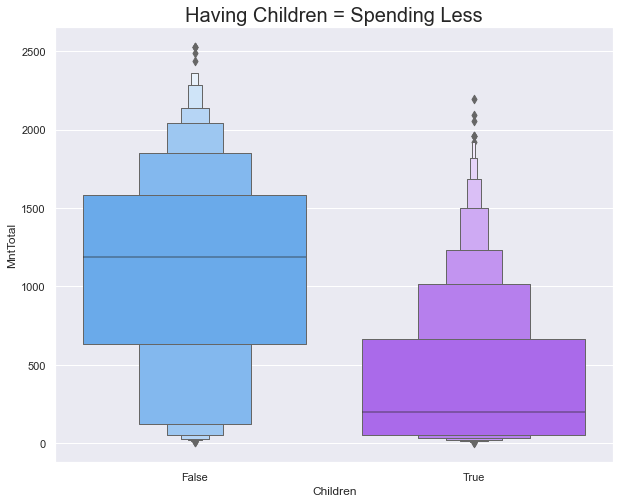

In [41]:
sns.boxenplot(x = "Children", y = "MntTotal", data = data, palette="cool")
plt.title("Having Children = Spending Less", fontsize = 20)
plt.show()

There are many possible reasons for this, including

1. Parents need to spend the money on their children
2. Children steal money from their parents
3. Children force parents to spend money on toys, not on wine and meat
4. Having children stresses the parents, hence the parents perform worse at work => less income.

I'm sure there are many more reasons besides these 4, but there is definite evidence (easily extendable to people outside of this population) that having children does result in less spending.